In [15]:
import sys
!{sys.executable} -m pip install pandas numpy scikit-learn matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
# If the CSV is in the same folder as the notebook:
df = pd.read_csv('weather_data_extended.csv')
display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Location          800 non-null    object 
 1   Temperature (°C)  800 non-null    float64
 2   Feels Like (°C)   800 non-null    float64
 3   Humidity (%)      798 non-null    float64
 4   Wind Speed (kph)  798 non-null    float64
 5   Cloud Cover (%)   800 non-null    int64  
 6   Pressure (mb)     798 non-null    float64
 7   UV Index          800 non-null    int64  
 8   Visibility (km)   800 non-null    int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 56.4+ KB


None

,Location,Temperature (°C),Feels Like (°C),Humidity (%),Wind Speed (kph),Cloud Cover (%),Pressure (mb),UV Index,Visibility (km)
0,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16
1,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16
2,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16
3,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16
4,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16


df.isnull().sum()

In [17]:
# Check missing values
df.isnull().sum()

Location            0
Temperature (°C)    0
Feels Like (°C)     0
Humidity (%)        2
Wind Speed (kph)    2
Cloud Cover (%)     0
Pressure (mb)       2
UV Index            0
Visibility (km)     0
dtype: int64

In [18]:
# Drop rows with any NA (same as your step)
df = df.dropna().copy()
df.describe(include='all')

,Location,Temperature (°C),Feels Like (°C),Humidity (%),Wind Speed (kph),Cloud Cover (%),Pressure (mb),UV Index,Visibility (km)
count,794,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000
unique,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Paris,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,16.580730,16.373804,73.513854,16.123300,43.513854,1013.041562,1.746851,10.732997
std,NaN,5.574821,7.382814,16.478897,10.338986,34.845115,7.608453,1.092285,1.966105
min,NaN,8.300000,4.500000,40.000000,3.600000,0.000000,900.000000,1.000000,10.000000
25%,NaN,15.000000,13.800000,67.000000,6.100000,0.000000,1012.000000,1.000000,10.000000
50%,NaN,16.000000,16.000000,76.000000,9.000000,50.000000,1013.000000,1.000000,10.000000
75%,NaN,24.000000,25.500000,88.000000,24.100000,75.000000,1019.250000,2.000000,10.000000


In [ ]:
# String indexing on 'Location'
df['Location_index'] = df['Location'].astype('category').cat.codes

# Show mapping (cities → indices)
unique_df = pd.DataFrame({
    'Unique_Locations': df['Location'].drop_duplicates().reset_index(drop=True),
    'Unique_Location_Indices': df['Location_index'].drop_duplicates().reset_index(drop=True)
})
unique_df

,Unique_Locations,Unique_Location_Indices
0,New York,3
1,London,2
2,Tokyo,7
3,Paris,4
4,Sydney,6
5,Dubai,0
6,Rome,5
7,Hong Kong,1


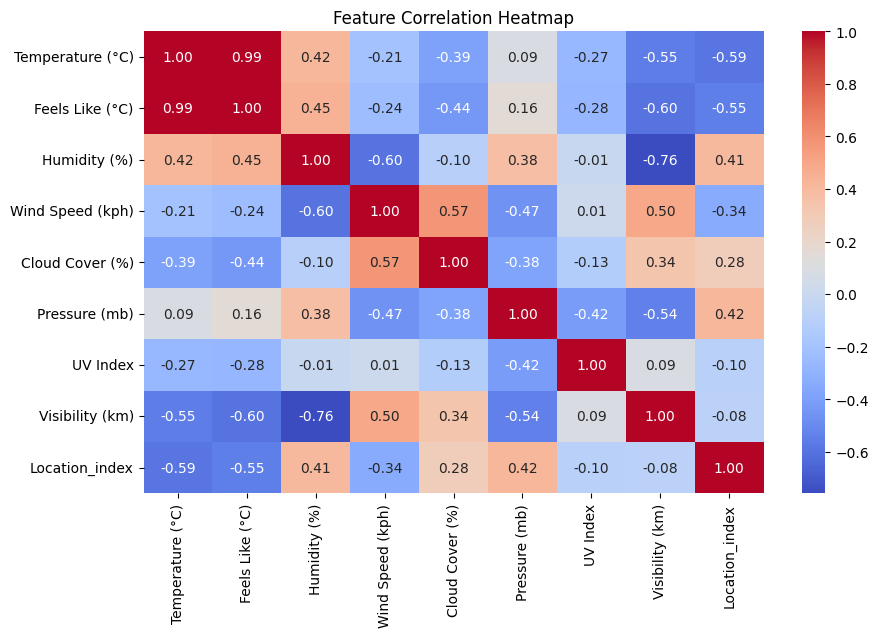

In [20]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

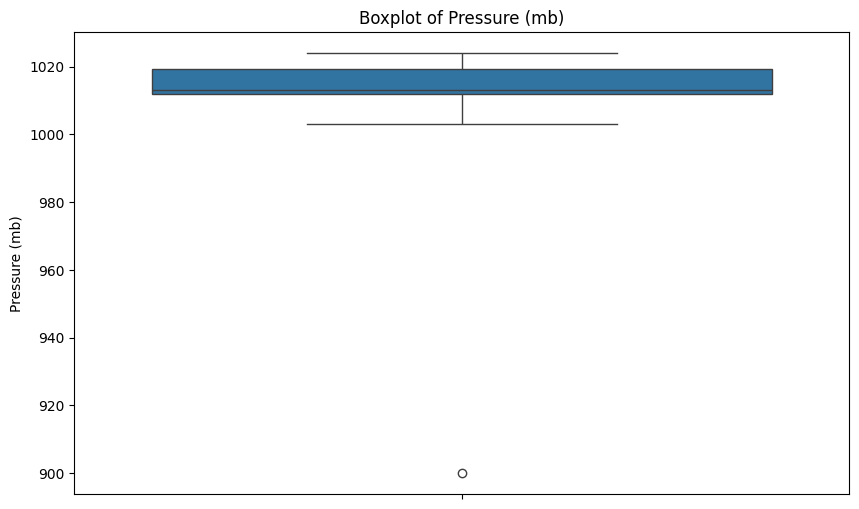

In [21]:
# Boxplot of Pressure (mb) 
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['Pressure (mb)'])
plt.title('Boxplot of Pressure (mb)')
plt.show()

In [22]:
# Features and target variable
X = df[['Humidity (%)', 'Wind Speed (kph)', 'Pressure (mb)', 'Visibility (km)', 'Location_index']]
y = df['Temperature (°C)']

In [23]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
len(X_train), len(X_test)

(635, 159)

In [24]:
# Baseline model: Linear Regression
lin_baseline = LinearRegression()
lin_baseline.fit(X_train, y_train)

y_pred_base = lin_baseline.predict(X_test)

mse_base = mean_squared_error(y_test, y_pred_base)
r2_base  = r2_score(y_test, y_pred_base)
print(f'Mean Squared Error (Baseline): {mse_base:.2f}')
print(f'R-squared Score (Baseline): {r2_base:.2f}')

Mean Squared Error (Baseline): 1.94
R-squared Score (Baseline): 0.94


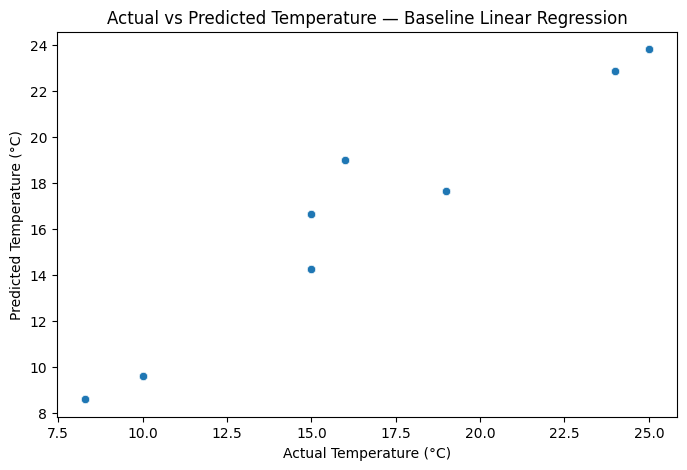

In [25]:
# Scatter plot of Actual vs Predicted for Baseline model
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred_base)
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.title('Actual vs Predicted Temperature — Baseline Linear Regression')

plt.show()

In [26]:
# Different models to compare, Compare Linear Models
num_cols = ['Humidity (%)', 'Wind Speed (kph)', 'Pressure (mb)', 'Visibility (km)']
cat_cols = ['Location_index']  

models = {
    "Simple Linear Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]),
    "Ridge Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", Ridge(alpha=1.0, random_state=42))
    ]),
    "Lasso Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", Lasso(alpha=0.1, max_iter=10000, random_state=42))
    ]),
    # "Elastic Net": Pipeline([
    #("scaler", StandardScaler()),
    #("model", ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000, random_state=42))
    #]),
}

results = {}
predictions = {}

for name, pipe in models.items():
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    predictions[name] = y_pred
    results[name] = {
        "MSE": mean_squared_error(y_test, y_pred),
        "R² Score": r2_score(y_test, y_pred)
    }

results_df = pd.DataFrame(results).T.sort_values(by="MSE")
print(results_df)

                               MSE  R² Score
Simple Linear Regression  1.936225  0.941366
Ridge Regression          1.953107  0.940855
Lasso Regression          2.402812  0.927236


In [27]:
# save results to CSV
#results_df.to_csv("model_results_comparison.csv", index=True)
#print("Saved: model_results_comparison.csv")

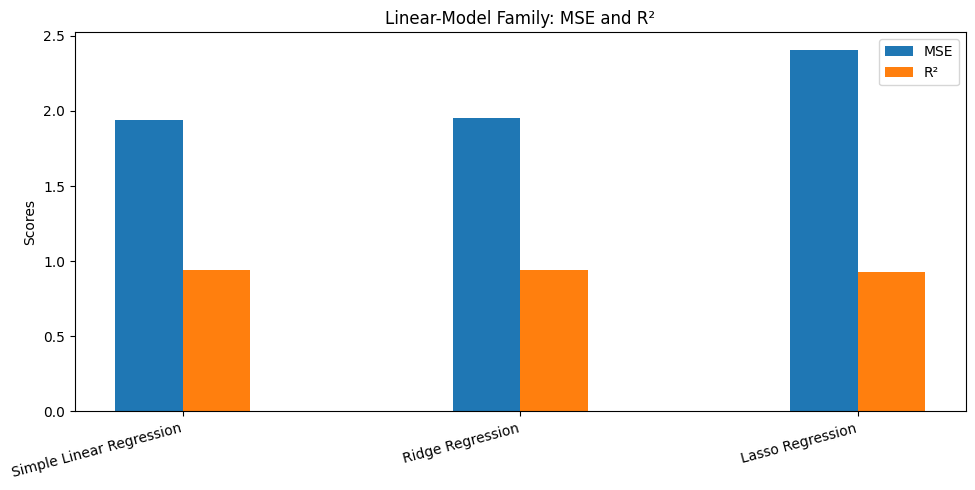

In [28]:
# Visualization of results
plt.figure(figsize=(10, 5))
labels = results_df.index.tolist()
mse_vals = results_df["MSE"].values
r2_vals  = results_df["R² Score"].values

x = np.arange(len(labels))
bar_width = 0.2

plt.bar(x - bar_width/2, mse_vals, width=bar_width, label="MSE")
plt.bar(x + bar_width/2, r2_vals,  width=bar_width, label="R²")

plt.xticks(x, labels, rotation=15, ha="right")
plt.ylabel("Scores")
plt.title("Linear-Model Family: MSE and R²")
plt.legend()
plt.tight_layout()
plt.show()